<a href="https://colab.research.google.com/github/hache22/Warriors-Games/blob/main/NBA_ANALISIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Script de python utilizara la api de la NBA para tomar datos sobre los equipos y seleccionar informacion sobre como jugaron los "Warriors" tanto de local como de visitante.


Comenzando con la instalacion de la API REST proviniente de la pagina oficial de la NBA

In [ ]:
!pip install nba_api

In [1]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [2]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [3]:
nba_teams = teams.get_teams()

In [4]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [6]:
import pandas as pd

In [7]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


*Creando Data Frame de Warriors*

In [8]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [9]:
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [10]:
from nba_api.stats.endpoints import leaguegamefinder

En esta seccion se procede a descargar el marco de los datos

In [11]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [12]:
nombre_archivo = "Golden_State.pkl"
juegos = pd.read_pickle(nombre_archivo)
juegos.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


creacion dos marcos de datos, *uno para los partidos que los Warriors enfrentaron a los Raptors* en casa y *el segundo para los partidos fuera de casa*contra los Raptors

In [13]:
juegos_local=juegos[juegos['MATCHUP']=='GSW vs. TOR']
juegos_visitante=juegos[juegos['MATCHUP']=='GSW @ TOR']

Se prodece calcular la media de la columna MÁS_MINUS para los marcos de datos juegos_local y juegos_visitante

In [14]:
# De local
juegos_local["PLUS_MINUS"].mean()

3.730769230769231

In [15]:
# De Visitante
juegos_visitante["PLUS_MINUS"].mean()

-0.6071428571428571

Podemos trazar la columna "PLUS MINUS" para los marcos de datos Juegos_local y  Juegos_visitante. Lo que se puede ver es que los Warriors jugaron mejor en casa.

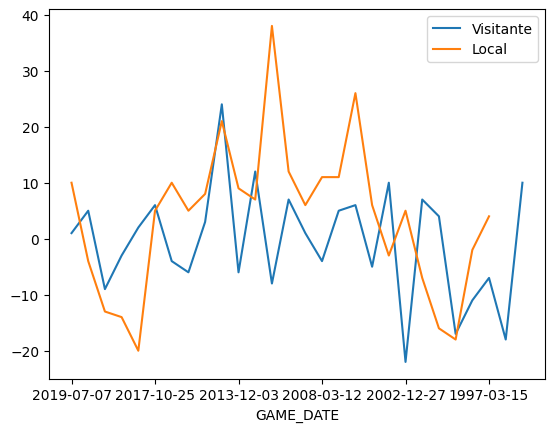

In [18]:
fig, ax = plt.subplots()

juegos_visitante.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
juegos_local.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["Visitante", "Local"])
plt.show()

**Calculando la media de puntos realizados tanto en partidos de local como de visitante**

In [19]:
print("La media de puntos realizados de local es de : ",juegos_local["PTS"].mean())

La media de puntos realizados de local es de :  106.8076923076923


In [20]:
print("La media de puntos realizados de visitante es de : ",juegos_visitante["PTS"].mean())

La media de puntos realizados de visitante es de :  102.96428571428571


Se procede a crear un marco de datos con la cantidad maxima y minima de puntos realizados tanto de local como visitante, ademas de la media de puntos por partidos junto con la desviacion estandar de esta media.

In [22]:
desempeño_local =juegos_local["PTS"].max() ,juegos_local["PTS"].min(),juegos_local["PTS"].mean(), juegos_local["PTS"].std()

In [40]:
df_desempeño_local = pd.DataFrame([desempeño_local],
                  columns=["Puntos Máximos", "Puntos Minimos", "Media de Puntos", "Desviación Estandar"])

In [52]:
df_desempeño_local

,Puntos Máximos,Puntos Minimos,Media de Puntos,Desviación Estandar
0,138,80,106.807692,15.435075


In [23]:
desempeño_visitante = juegos_visitante["PTS"].max() ,juegos_visitante["PTS"].min(),juegos_visitante["PTS"].mean(), juegos_visitante["PTS"].std()

In [41]:
df_desempeño_visitante = pd.DataFrame([desempeño_visitante],
                  columns=["Puntos Máximos", "Puntos Minimos", "Media de Puntos", "Desviación Estandar"])

In [53]:
df_desempeño_visitante

,Puntos Máximos,Puntos Minimos,Media de Puntos,Desviación Estandar
0,128,69,102.964286,15.483521


Marco de datos **Final** mostrando las diferencias de puntos tanto de local como de visitante

In [54]:
desempeño_total = pd.DataFrame([desempeño_local] + [desempeño_visitante],  columns=["Puntos Máximos", "Puntos Minimos", "Media de Puntos", "Desviación Estandar"])

In [55]:
desempeño_total

,Puntos Máximos,Puntos Minimos,Media de Puntos,Desviación Estandar
0,138,80,106.807692,15.435075
1,128,69,102.964286,15.483521


**En conclusion, se puede decir que el equipo "Golden State Warriors" tuvo un mejor desempeño deportivo jugando partidos de local con una media de 107 puntos por partido, a diferencia de los 13 puntos en promedio jugando de visitante**